# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
# import math
# N = 10000
# d = 10
# ads_selected = []
# numbers_of_selections = [0] * d
# sums_of_rewards = [0] * d
# total_reward = 0
# for n in range(0, N):
#     ad = 0
#     max_upper_bound = 0
#     for i in range(0, d):
#         if (numbers_of_selections[i] > 0):
#             average_reward = sums_of_rewards[i] / numbers_of_selections[i]
#             delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
#             upper_bound = average_reward + delta_i
#         else:
#             upper_bound = 1e400
#         if upper_bound > max_upper_bound:
#             max_upper_bound = upper_bound
#             ad = i
#     ads_selected.append(ad)
#     numbers_of_selections[ad] = numbers_of_selections[ad] + 1
#     reward = dataset.values[n, ad]
#     sums_of_rewards[ad] = sums_of_rewards[ad] + reward
#     total_reward = total_reward + reward

## Implementing UCB

In [8]:
import math
N = 7000
d = 10
ads_selected = []
numbers_of_selections = [0] * d  #no of times an ith ad was selected
sums_of_rewards = [0] * d       #accumulated reward upto round "n"
total_reward = 0
for n in range(N):
    ad=0 #we are starting with first ad...that is why ad=0
    # here we will find UCB's of all the ads one by one...so before that initialize max upper bound as zero
    max_upper_bound=0
    for i in range(d):
        if numbers_of_selections[i]>0:
            average_reward=sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound=average_reward+delta_i
        else:
            upper_bound=1e400
            
        # now check if upper_bound is greater or not
        if upper_bound > max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward
            
        

## Visualising the results

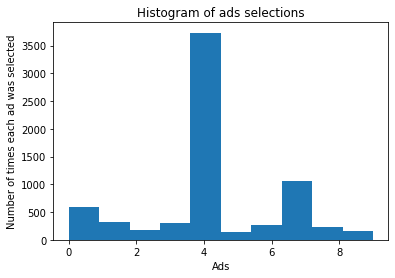

In [9]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()